In [4]:
%load_ext autoreload
%matplotlib inline

In [5]:
# Note: this notebook requires the tsfresh library which is no longer used and therefore not in the Pipfile

In [6]:
import os
import sys
import pandas as pd

sys.path.append(os.path.join("../.."))

import plot.pyplot as plt
import util
from database.CERNMongoClient import CERNMongoClient
from pipeline import pipeline
from preprocessing import feature_extraction
import plot.plot_evaluation

from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

%autoreload 2

In [10]:
df = feature_extraction.load_features_from_file(beam=1)

Loading file '../../../data-cern/features_B1.csv'.


## Extract 1

In [13]:
df1 = df.loc['2016-03-17':'2016-04-04']
ts_df=df1[['MKI.A5L2.B1:TEMP_MAGNET_UP']].copy()
ts_df.reset_index(level=0, inplace=True)
ts_df['id'] =(ts_df["timestamps"].diff() > pd.Timedelta(minutes=30)).cumsum()

In [14]:
X = extract_features(timeseries_container=ts_df,column_id='id',column_sort='timestamps')
X_no_zero_columns = X.loc[:, (X != 0).any(axis=0)]

Feature Extraction: 100%|██████████| 18/18 [00:03<00:00,  4.90it/s]


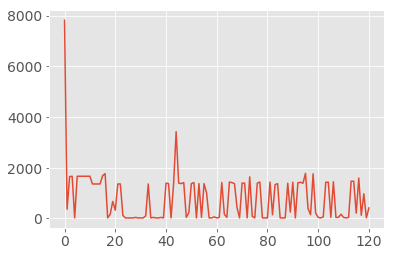

In [16]:
#Fourier transform
f1=X['MKI.A5L2.B1:TEMP_MAGNET_UP__fft_coefficient__coeff_0__attr_"real"']
plt.plot(f1)

## Extract 2

In [17]:
df2 = df.loc['2016-07-18':'2016-08-05']
ts_df=df2[['MKI.A5L2.B1:TEMP_MAGNET_UP']].copy()
ts_df.reset_index(level=0, inplace=True)
ts_df['id'] =(ts_df["timestamps"].diff() > pd.Timedelta(minutes=30)).cumsum()
X = extract_features(timeseries_container=ts_df,column_id='id',column_sort='timestamps')
X_no_zero_columns = X.loc[:, (X != 0).any(axis=0)]

Feature Extraction: 100%|██████████| 18/18 [00:21<00:00,  5.11s/it]


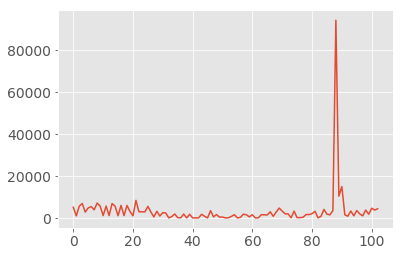

In [20]:
#Fourier transform
f1=X['MKI.A5L2.B1:TEMP_MAGNET_UP__fft_coefficient__coeff_0__attr_"real"']
plt.plot(f1)

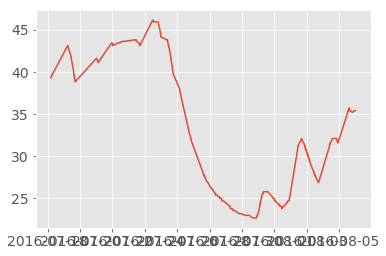

In [19]:
plt.plot(ts_df['timestamps'], ts_df['MKI.A5L2.B1:TEMP_MAGNET_UP'])